# WeatherPy
----
## Observations

Latitude appears to correlate with temperature: the closer a city is to the equator, the higher the temperature. As you move away from the equator - either north or south - the temperature decreases.

Latitude does not appear to affect the percentage of cloudiness. 
Throughout the specturm of latitude, some cities are at 100% cloudiness while others are at 0%.

The majority of cities have wind speeds below 20mph but the wind speed does not appear to increase or decrease as one moves north or south in latitude.

----
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from api_keys import weather_api_key
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) 

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        city = city.replace(" ","%20") #replace space with 20% so url doesnt break.
        
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

792

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url+cities[0])
#Set up respone info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)

ssing Record 198 | codrington
City not found. Skipping...
Processing Record 199 | juneau
Processing Record 200 | gushi
Processing Record 201 | wooster
Processing Record 202 | bima
Processing Record 203 | camargo
Processing Record 204 | hasaki
Processing Record 205 | new%20norfolk
Processing Record 206 | sao%20jose%20da%20coroa%20grande
Processing Record 207 | qaanaaq
Processing Record 208 | makakilo%20city
Processing Record 209 | xifeng
Processing Record 210 | thinadhoo
Processing Record 211 | puerto%20ayora
Processing Record 212 | tiarei
Processing Record 213 | isla%20mujeres
Processing Record 214 | esperance
Processing Record 215 | lancaster
Processing Record 216 | hervey%20bay
Processing Record 217 | lebu
Processing Record 218 | fairbanks
Processing Record 219 | faanui
Processing Record 220 | mount%20isa
Processing Record 221 | tuatapere
Processing Record 222 | penzance
Processing Record 223 | new%20norfolk
Processing Record 224 | svetlogorsk
Processing Record 225 | ponta%20do%20sol

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
city_data = pd.DataFrame({"City": city_name,
                         "Cloudiness": cloudiness,
                         "Country": country, 
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})

city_data.to_csv("city_weather_data.csv")
city_data.count()

City          730
Cloudiness    730
Country       730
Date          730
Humidity      730
Lat           730
Lng           730
Max Temp      730
Wind Speed    730
dtype: int64

In [47]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1612026470,93,59.7035,30.7861,-2.00,5.00
1,Korla,0,CN,1612026663,79,41.7597,86.1469,-3.89,2.65
2,San Nicolas,28,PH,1612026684,71,18.1725,120.5953,20.24,4.66
3,Hambantota,90,LK,1612026671,83,6.1241,81.1185,25.65,5.26
4,Chokurdakh,3,RU,1612026613,85,70.6333,147.9167,-33.85,3.18


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
city_data_H_under100 = city_data.loc[city_data["Humidity"]<100]
city_data_H_under100

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1612026470,93,59.7035,30.7861,-2.00,5.00
1,Korla,0,CN,1612026663,79,41.7597,86.1469,-3.89,2.65
2,San Nicolas,28,PH,1612026684,71,18.1725,120.5953,20.24,4.66
3,Hambantota,90,LK,1612026671,83,6.1241,81.1185,25.65,5.26
4,Chokurdakh,3,RU,1612026613,85,70.6333,147.9167,-33.85,3.18
...,...,...,...,...,...,...,...,...,...
725,Eskil,100,TR,1612038757,96,38.4017,33.4131,2.60,7.31
726,Hobyo,7,SO,1612038758,78,5.3505,48.5268,24.17,6.76
727,Lamar,90,US,1612038760,77,33.6668,-95.5836,20.00,7.72
728,Somerset East,15,ZA,1612038762,79,-32.7217,25.5880,16.71,4.11


In [49]:
#  Get the indices of cities that have humidity over 100%.
city_data_H_above100 = city_data.loc[city_data["Humidity"]>100]
city_data_H_above100.index


Int64Index([], dtype='int64')

In [50]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_H_under100
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,75,RU,1612026470,93,59.7035,30.7861,-2.00,5.00
1,Korla,0,CN,1612026663,79,41.7597,86.1469,-3.89,2.65
2,San Nicolas,28,PH,1612026684,71,18.1725,120.5953,20.24,4.66
3,Hambantota,90,LK,1612026671,83,6.1241,81.1185,25.65,5.26
4,Chokurdakh,3,RU,1612026613,85,70.6333,147.9167,-33.85,3.18
...,...,...,...,...,...,...,...,...,...
725,Eskil,100,TR,1612038757,96,38.4017,33.4131,2.60,7.31
726,Hobyo,7,SO,1612038758,78,5.3505,48.5268,24.17,6.76
727,Lamar,90,US,1612038760,77,33.6668,-95.5836,20.00,7.72
728,Somerset East,15,ZA,1612038762,79,-32.7217,25.5880,16.71,4.11


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

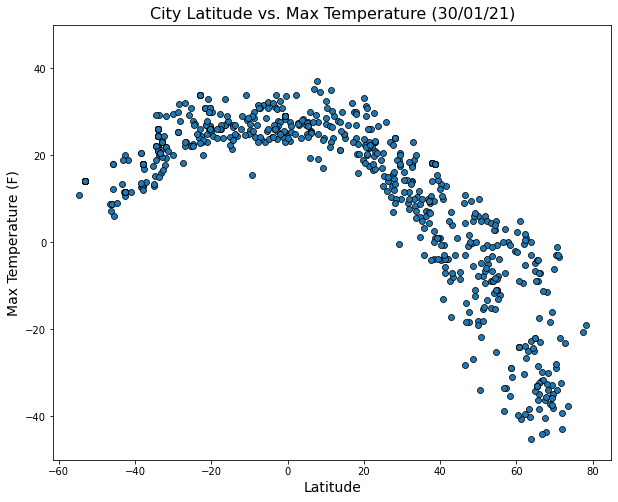

In [51]:
# Plotting the data for Latitude vs Max Temp
plt.figure(figsize=(10,8))
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'],edgecolor="black", linewidth = .75)
plt.title(f"City Latitude vs. Max Temperature (30/01/21)", fontsize="16")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Max Temperature (F)", fontsize="14")
plt.ylim(-50, 50)
plt.savefig("Lat vs Temp.png")

plt.show()

## Latitude vs. Humidity Plot

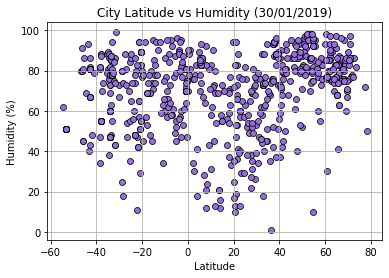

In [52]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolor="black", linewidth = .75, color="mediumpurple")
plt.title("City Latitude vs Humidity (30/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("Lat vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

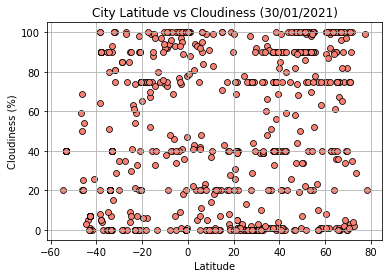

In [53]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness (30/01/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("Lat vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

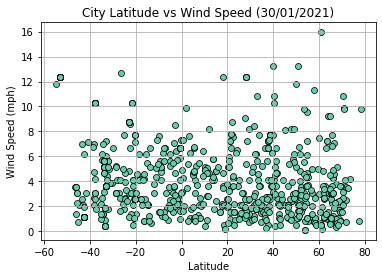

In [54]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed (30/01/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Lat vs Wind.png")
plt.show()

## Linear Regression

The r-squared is: 0.7643023756099327


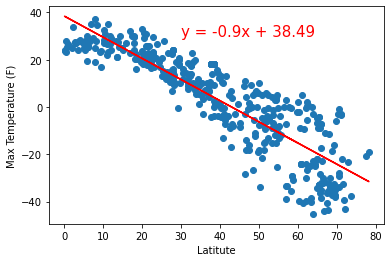

In [55]:
#Filter out Nothen and Southen Hemisphere data using Latidudes
clean_city_data_Nth = clean_city_data.loc[clean_city_data["Lat"] > 0]
clean_city_data_Sth = clean_city_data.loc[clean_city_data["Lat"] < 0]

x_values = clean_city_data_Nth['Lat']
y_values = clean_city_data_Nth['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6285645900148247


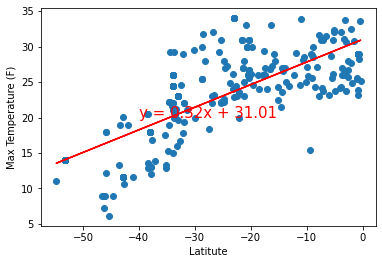

In [56]:
x_values = clean_city_data_Sth['Lat']
y_values = clean_city_data_Sth['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.15298817345139287


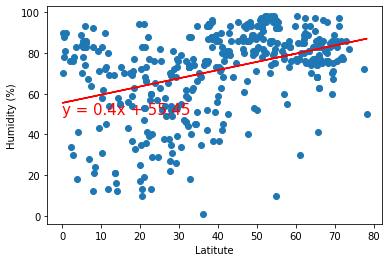

In [57]:
x_values = clean_city_data_Nth['Lat']
y_values = clean_city_data_Nth['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06438722025631388


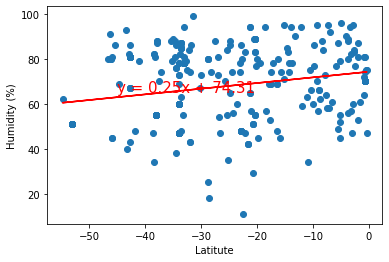

In [58]:
x_values = clean_city_data_Sth['Lat']
y_values = clean_city_data_Sth['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,65),fontsize=15,color="red")
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06961966760891786


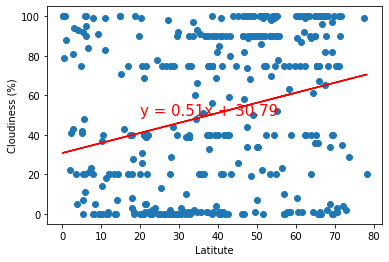

In [59]:
x_values = clean_city_data_Nth['Lat']
y_values = clean_city_data_Nth['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.039092996567320806


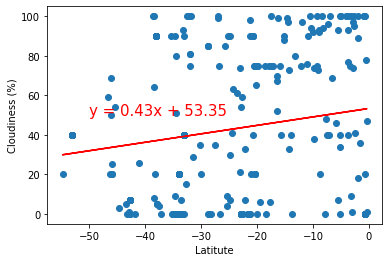

In [60]:
x_values = clean_city_data_Sth['Lat']
y_values = clean_city_data_Sth['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005543479518083465


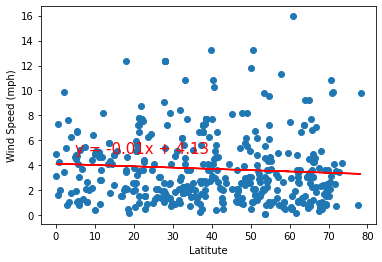

In [61]:
x_values = clean_city_data_Nth['Lat']
y_values = clean_city_data_Nth['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1636160198230599


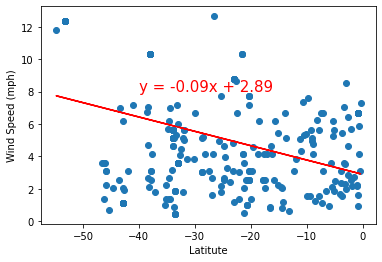

In [62]:
x_values = clean_city_data_Sth['Lat']
y_values = clean_city_data_Sth['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,8),fontsize=15,color="red")
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression